In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [3]:
X = df.drop('class', axis=1)

In [4]:
# Scaling and PCA for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Isolation Forest

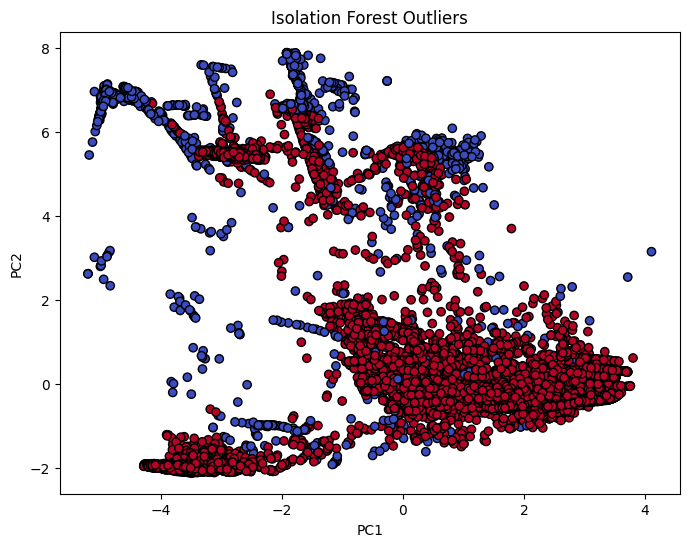

In [6]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
label_if = iso_forest.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_if, cmap='coolwarm', edgecolor='k')
plt.title("Isolation Forest Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Local Outlier Factor (LOF)

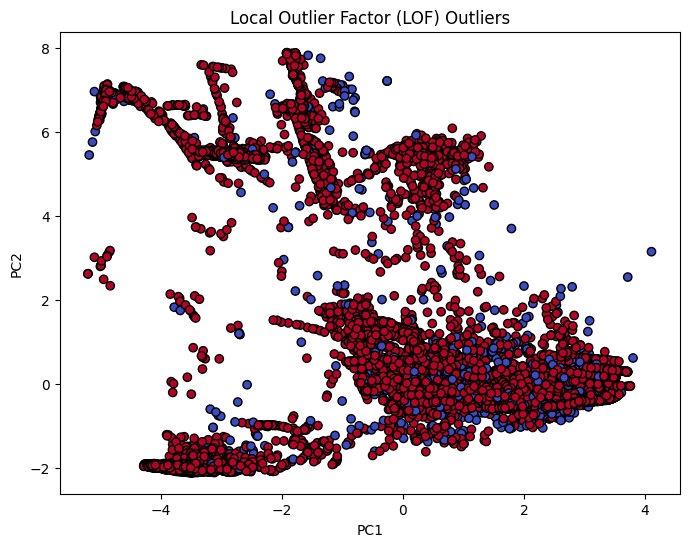

In [7]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
label_lof = lof.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_lof, cmap='coolwarm', edgecolor='k')
plt.title("Local Outlier Factor (LOF) Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

DBSCAN for Anomaly Detection

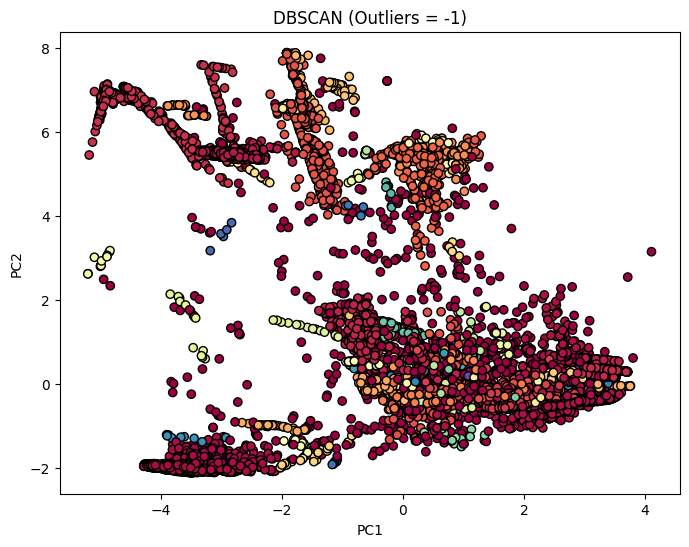

In [8]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
label_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_dbscan, cmap='Spectral', edgecolor='k')
plt.title("DBSCAN (Outliers = -1)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()